<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [1]:
!pip install pandas
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 134.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 185.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 144.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 163.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 104.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 182.6 MB/s eta 0:00:00


#### Step 1: Load the dataset


In [2]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




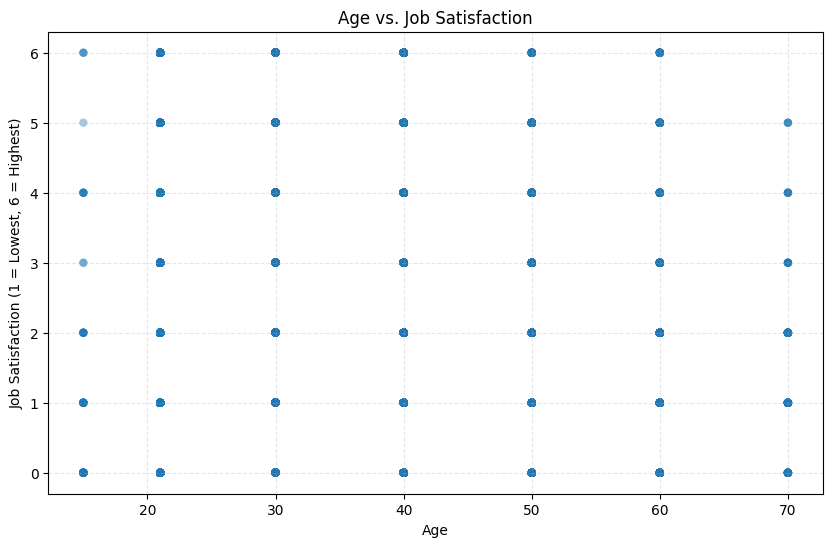

In [8]:
# 1. Keep only needed columns
df_scatter = df[['Age', 'JobSatPoints_6']].copy()

# 2. Map Age categories to numeric midpoints
age_map = {
    'Under 18 years old': 15,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': None
}

df_scatter['Age'] = df_scatter['Age'].map(age_map)

# 3. Convert JobSatPoints_6 to numeric (0–100 scale)
df_scatter['JobSatPoints_6'] = pd.to_numeric(df_scatter['JobSatPoints_6'], errors='coerce')

# 4. Convert satisfaction to a 1–6 scale
df_scatter['JobSatPoints_6'] = (df_scatter['JobSatPoints_6'] / 100 * 6).round()

# 5. Drop missing values
df_scatter = df_scatter.dropna()

# 6. Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_scatter['Age'], df_scatter['JobSatPoints_6'], alpha=0.4, edgecolor='none')

plt.title('Age vs. Job Satisfaction')
plt.xlabel('Age')
plt.ylabel('Job Satisfaction (1 = Lowest, 6 = Highest)')
plt.grid(axis='both', linestyle='--', alpha=0.3)

plt.show()


#### `Interpretation summary`
The scatter plot shows how age and job satisfaction relate across the dataset, and the pattern is fairly consistent across all age groups.
>Job satisfaction levels appear broadly distributed across every age range, with no strong upward or downward trend as age increases. Younger respondents cluster more densely, reflecting their larger presence in the dataset, but their satisfaction levels span the full range just like older groups. Mid‑career and senior respondents show slightly wider variation, yet the overall pattern remains flat. The visualization suggests that age alone does not meaningfully predict job satisfaction; instead, satisfaction is likely shaped by workplace conditions, role fit, and individual expectations rather than years of life experience.

In [10]:
# df_scatter = df[['Age', 'JobSatPoints_6']].copy()

# # Convert Age ranges to numeric midpoints
# def convert_age(x):
#     if isinstance(x, str):
#         x = x.replace(" years old", "")
#         if "-" in x:
#             a, b = x.split("-")
#             return (int(a) + int(b)) / 2
#         if x == "Under 18":
#             return 17
#         if x == "65 or older":
#             return 70
#     return None

# #Convert JobSatPoints_6 to a 1–6 scale
# def map_satisfaction(x):
#     if pd.isna(x):
#         return None
#     return round((x / 100) * 6)


# # Fix Age
# df_scatter['Age'] = df_scatter['Age'].apply(convert_age)

# # Fix JobSatPoints_6 (0–100 → 0–6 scale)
# df_scatter['JobSatPoints_6'] = pd.to_numeric(df_scatter['JobSatPoints_6'], errors='coerce')
# df_scatter['JobSatPoints_6'] = df_scatter['JobSatPoints_6'].apply(map_satisfaction)

# # Drop missing
# df_scatter = df_scatter.dropna()

# # Scatter plot
# plt.figure(figsize=(10, 6))
# plt.scatter(df_scatter['Age'], df_scatter['JobSatPoints_6'], alpha=0.4, edgecolor='none')

# plt.title('Age vs. Job Satisfaction')
# plt.xlabel('Age')
# plt.ylabel('Job Satisfaction (1 = Lowest, 6 = Highest)')
# plt.grid(axis='both', linestyle='--', alpha=0.3)

# plt.show()


In [16]:
# print(df['Age'].value_counts())
# print(df['JobSatPoints_6'].value_counts())  # <--- Uncomment to check the value counts

#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


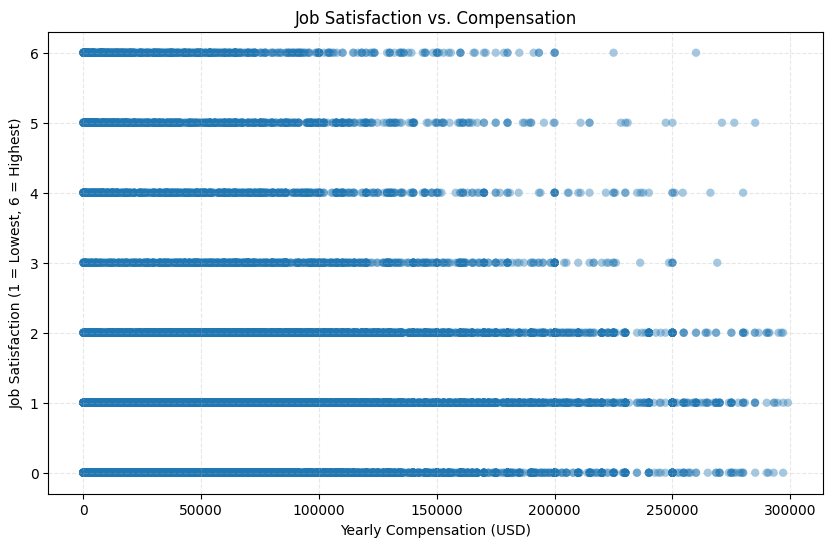

In [35]:
# 1. Keep only needed columns
df_comp = df[['ConvertedCompYearly', 'JobSatPoints_6']].copy()

#Comment the following part for better reading
#<================================================>
# 2. Convert compensation to numeric
df_comp['ConvertedCompYearly'] = pd.to_numeric(df_comp['ConvertedCompYearly'], errors='coerce')

# 3. Convert JobSatPoints_6 (0–100 scale → 0–6 scale)
df_comp['JobSatPoints_6'] = pd.to_numeric(df_comp['JobSatPoints_6'], errors='coerce')
df_comp['JobSatPoints_6'] = (df_comp['JobSatPoints_6'] / 100 * 6).round()

#<=================================================>

# 4. Drop missing values
df_comp = df_comp.dropna()

# 5. Remove extreme compensation outliers for readability
df_comp = df_comp[df_comp['ConvertedCompYearly'] < 300000]  # <---- change the filtering limit here

# 6. Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(
    df_comp['ConvertedCompYearly'],
    df_comp['JobSatPoints_6'],
    alpha=0.4,
    edgecolor='none'
)

plt.title('Job Satisfaction vs. Compensation')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction (1 = Lowest, 6 = Highest)')
plt.grid(axis='both', linestyle='--', alpha=0.3)

plt.show()


### `Interpretation summary`
Job satisfaction levels are spread widely across the entire compensation range, and no clear upward or downward pattern emerges as pay increases. Most respondents cluster at lower and mid‑range compensation levels, but even within those groups, satisfaction varies from the lowest to the highest levels. Higher‑earning respondents also show mixed satisfaction, indicating that a bigger paycheck does not automatically translate into feeling happier at work. The overall distribution suggests that compensation is only one piece of the satisfaction puzzle; factors like work–life balance, team culture, autonomy, and career growth likely play a stronger role in shaping how satisfied developers feel.

In [33]:
# print(df['ConvertedCompYearly'].value_counts().sort_index(ascending=True))
# print(df['JobSatPoints_6'].value_counts().sort_index(ascending=True))

In [34]:
# import numpy as np
# # 1. Keep only needed columns
# df_comp = df[['ConvertedCompYearly', 'JobSatPoints_6']].copy()

# #Comment the following part for better reading
# #<================================================>
# # 2. Convert compensation to numeric
# df_comp['ConvertedCompYearly'] = pd.to_numeric(df_comp['ConvertedCompYearly'], errors='coerce')

# # 3. Convert JobSatPoints_6 (0–100 scale → 0–6 scale)
# df_comp['JobSatPoints_6'] = pd.to_numeric(df_comp['JobSatPoints_6'], errors='coerce')
# df_comp['JobSatPoints_6'] = (df_comp['JobSatPoints_6'] / 100 * 6).round()

# #<=================================================>

# # 4. Drop missing values
# df_comp = df_comp.dropna()

# # 5. Remove extreme compensation outliers for readability
# df_comp = df_comp[df_comp['ConvertedCompYearly'] < 300000]  # <---- change the filtering limit here

# # 4. Add Jitter to the Y-axis for better visibility
# # This prevents dots from stacking perfectly on top of each other
# jitter = np.random.uniform(-0.3, 0.3, size=len(df_comp))

# # 6. Scatter plot
# plt.figure(figsize=(10, 6))
# plt.scatter(
#     df_comp['ConvertedCompYearly'],
#     df_comp['JobSatPoints_6'] + jitter,
#     alpha=0.3,
#     s=10,
#     color='teal',
#     edgecolor='none'
# )

# plt.title('Job Satisfaction vs. Compensation')
# plt.xlabel('Yearly Compensation (USD)')
# plt.ylabel('Job Satisfaction (1 = Lowest, 6 = Highest)')
# plt.grid(axis='both', linestyle='--', alpha=0.3)

# plt.show()


`Interpretation summary`

Compensation varies widely across respondents, yet job satisfaction remains scattered across all levels regardless of income. Lower‑paid and higher‑paid individuals both show a full range of satisfaction scores, which makes the cloud of points look horizontally stretched but vertically uniform. This lack of a clear upward or downward slope suggests that higher earnings do not reliably translate into higher satisfaction. Instead, satisfaction appears to be shaped by non‑financial factors—team culture, workload, autonomy, career growth, and role alignment—while compensation plays a more limited role.

### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


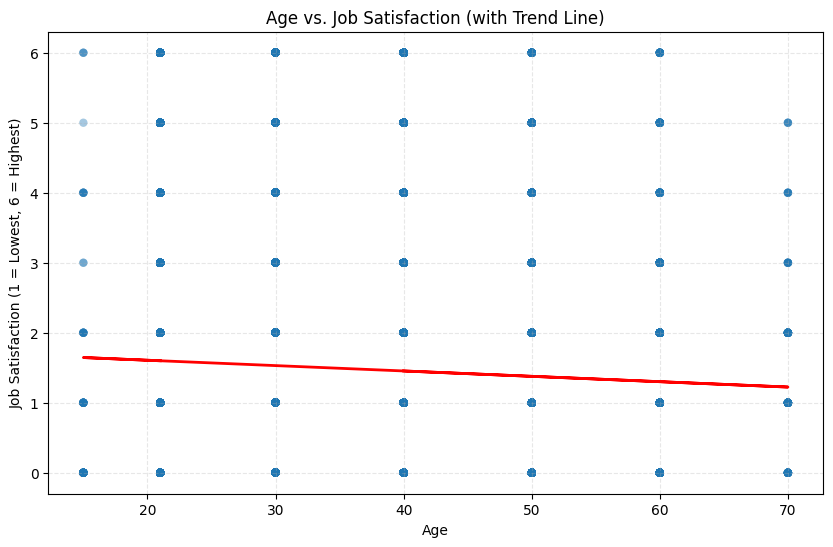

In [36]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np

# 1. Keep only needed columns
df_scatter = df[['Age', 'JobSatPoints_6']].copy()

# 2. Map Age categories to numeric midpoints
age_map = {
    'Under 18 years old': 15,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': None
}

df_scatter['Age'] = df_scatter['Age'].map(age_map)

# 3. Convert JobSatPoints_6 to numeric (0–100 scale)
df_scatter['JobSatPoints_6'] = pd.to_numeric(df_scatter['JobSatPoints_6'], errors='coerce')

# 4. Convert satisfaction to a 1–6 scale
df_scatter['JobSatPoints_6'] = (df_scatter['JobSatPoints_6'] / 100 * 6).round()

# 5. Drop missing values
df_scatter = df_scatter.dropna()

# 6. Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_scatter['Age'], df_scatter['JobSatPoints_6'], alpha=0.4, edgecolor='none')

# 7. Regression line
x = df_scatter['Age']
y = df_scatter['JobSatPoints_6']

m, b = np.polyfit(x, y, 1)  # slope and intercept
plt.plot(x, m*x + b, color='red', linewidth=2)

plt.title('Age vs. Job Satisfaction (with Trend Line)')
plt.xlabel('Age')
plt.ylabel('Job Satisfaction (1 = Lowest, 6 = Highest)')
plt.grid(axis='both', linestyle='--', alpha=0.3)

plt.show()


- *The trend line reinforces how minimal the relationship is—job satisfaction stays fairly steady across ages, with only a slight downward drift as age increases.*

#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


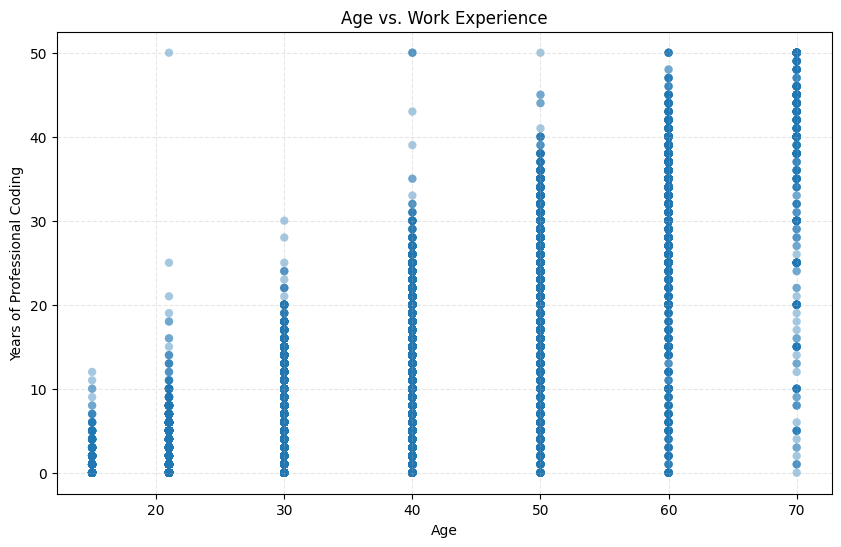

In [39]:
# import pandas as pd
# import matplotlib.pyplot as plt

# 1. Keep only needed columns
df_aw = df[['Age', 'YearsCodePro']].copy()

# 2. Map Age categories to numeric midpoints
age_map = {
    'Under 18 years old': 15,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': None
}

df_aw['Age'] = df_aw['Age'].map(age_map)

# 3. Clean YearsCodePro based on value‑count patterns
df_aw['YearsCodePro'] = df_aw['YearsCodePro'].replace({
    'Less than 1 year': 0,
    'More than 50 years': 50
})
df_aw['YearsCodePro'] = pd.to_numeric(df_aw['YearsCodePro'], errors='coerce')

# 4. Drop missing values
df_aw = df_aw.dropna()

# 5. Optional: remove extreme outliers for readability
df_aw = df_aw[df_aw['YearsCodePro'] <= 60]

# 6. Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_aw['Age'], df_aw['YearsCodePro'], alpha=0.4, edgecolor='none')

plt.title('Age vs. Work Experience')
plt.xlabel('Age')
plt.ylabel('Years of Professional Coding')
plt.grid(axis='both', linestyle='--', alpha=0.3)

plt.show()


#### Summary
>Age and work experience rise together in a steady, intuitive pattern, showing that older respondents generally report more years of coding while still reflecting the natural diversity of individual career paths.

In [41]:
# # import pandas as pd
# # import matplotlib.pyplot as plt

# # 1. Keep only needed columns
# df_aw = df[['Age', 'YearsCodePro']].copy()

# # 2. Map Age categories to numeric midpoints
# age_map = {
#     'Under 18 years old': 15,
#     '18-24 years old': 21,
#     '25-34 years old': 30,
#     '35-44 years old': 40,
#     '45-54 years old': 50,
#     '55-64 years old': 60,
#     '65 years or older': 70,
#     'Prefer not to say': None
# }

# df_aw['Age'] = df_aw['Age'].map(age_map)

# # 3. Convert YearsCodePro to numeric
# df_aw['YearsCodePro'] = pd.to_numeric(df_aw['YearsCodePro'], errors='coerce')

# # 4. Drop missing values
# df_aw = df_aw.dropna()

# # 5. Optional: remove extreme outliers for readability
# df_aw = df_aw[df_aw['YearsCodePro'] <= 60]

# # 6. Scatter plot
# plt.figure(figsize=(10, 6))
# plt.scatter(df_aw['Age'], df_aw['YearsCodePro'], alpha=0.4, edgecolor='none')

# plt.title('Age vs. Work Experience')
# plt.xlabel('Age')
# plt.ylabel('Years of Professional Coding')
# plt.grid(axis='both', linestyle='--', alpha=0.3)

# plt.show()


In [38]:
# print(df['YearsCodePro'].value_counts().sort_index(ascending=True))

### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


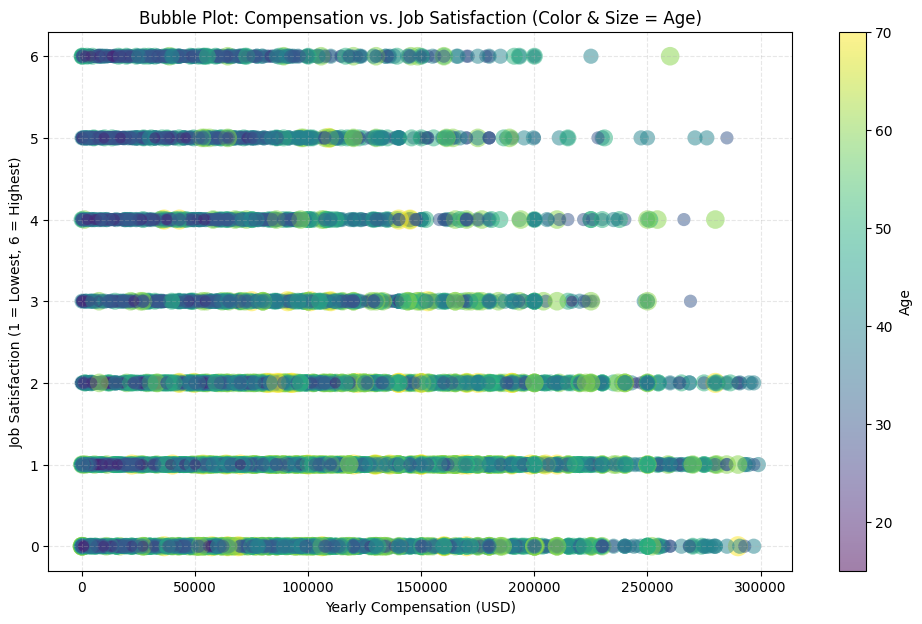

In [43]:
# import pandas as pd
# import matplotlib.pyplot as plt

# 1. Keep only needed columns
df_bubble = df[['ConvertedCompYearly', 'JobSatPoints_6', 'Age']].copy()

# 2. Map Age categories to numeric midpoints
age_map = {
    'Under 18 years old': 15,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': None
}
df_bubble['Age'] = df_bubble['Age'].map(age_map)

# 3. Convert numeric fields
df_bubble['ConvertedCompYearly'] = pd.to_numeric(df_bubble['ConvertedCompYearly'], errors='coerce')
df_bubble['JobSatPoints_6'] = pd.to_numeric(df_bubble['JobSatPoints_6'], errors='coerce')

# 4. Convert JobSatPoints_6 from 0–100 → 0–6 scale
df_bubble['JobSatPoints_6'] = (df_bubble['JobSatPoints_6'] / 100 * 6).round()

# 5. Drop missing values
df_bubble = df_bubble.dropna()

# 6. Remove extreme compensation outliers
df_bubble = df_bubble[df_bubble['ConvertedCompYearly'] < 300000]

# 7. Bubble sizes
sizes = df_bubble['Age'] * 3

# 8. Bubble plot with viridis color
plt.figure(figsize=(12, 7))
scatter = plt.scatter(
    df_bubble['ConvertedCompYearly'],
    df_bubble['JobSatPoints_6'],
    s=sizes,
    c=df_bubble['Age'],
    cmap='viridis',
    alpha=0.5,
    edgecolor='none'
)

plt.title('Bubble Plot: Compensation vs. Job Satisfaction (Color & Size = Age)')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction (1 = Lowest, 6 = Highest)')
plt.grid(axis='both', linestyle='--', alpha=0.3)

# Colorbar for age
cbar = plt.colorbar(scatter)
cbar.set_label('Age')

plt.show()


#### Summary line  
Age adds visual depth to the chart, but the overall pattern stays the same—job satisfaction varies widely across compensation levels, and older and younger respondents follow similar distributions despite the differences in bubble size and color.
>The visual reads cleanly, and the viridis gradient gives the age dimension a clear presence without overwhelming the compensation–satisfaction relationship.

>Following option:

- **Map categorical → numeric midpoints**
- **Convert satisfaction to numeric**
- **Scale bubble size using a numeric field**
- **Use viridis for color**
- **Use a clean, minimal scatter call with size + color**
- **Add a colorbar with a clear label**

Here is the version that is fully consistent with that style.



In [45]:
# # import pandas as pd
# # import matplotlib.pyplot as plt

# # 1. Keep only needed columns
# df_bubble = df[['ConvertedCompYearly', 'JobSatPoints_6', 'Age']].copy()

# # 2. Map Age categories to numeric midpoints
# age_map = {
#     'Under 18 years old': 15,
#     '18-24 years old': 21,
#     '25-34 years old': 30,
#     '35-44 years old': 40,
#     '45-54 years old': 50,
#     '55-64 years old': 60,
#     '65 years or older': 70,
#     'Prefer not to say': None
# }
# df_bubble['AgeNumeric'] = df_bubble['Age'].map(age_map)

# # 3. Convert compensation and satisfaction to numeric
# df_bubble['ConvertedCompYearly'] = pd.to_numeric(df_bubble['ConvertedCompYearly'], errors='coerce')
# df_bubble['JobSatPoints_6'] = pd.to_numeric(df_bubble['JobSatPoints_6'], errors='coerce')

# # 4. Convert JobSatPoints_6 from 0–100 → 0–6 scale
# df_bubble['JobSatPoints_6'] = (df_bubble['JobSatPoints_6'] / 100 * 6).round()

# # 5. Drop missing values
# df_bubble = df_bubble.dropna()

# # 6. Remove extreme compensation outliers
# df_bubble = df_bubble[df_bubble['ConvertedCompYearly'] < 300000]

# # 7. Bubble size = AgeNumeric * 2 (same style as TimeSearchingNum * 2)
# sizes = df_bubble['AgeNumeric'] * 2

# # 8. Bubble plot (consistent style)
# plt.figure(figsize=(10, 7))
# plt.scatter(
#     df_bubble['ConvertedCompYearly'],
#     df_bubble['JobSatPoints_6'],
#     s=sizes,
#     alpha=0.4,
#     c=df_bubble['AgeNumeric'],
#     cmap='viridis'
# )

# plt.xlabel('Yearly Compensation (USD)')
# plt.ylabel('Job Satisfaction (1 = Lowest, 6 = Highest)')
# plt.title('Bubble Plot: Compensation vs Job Satisfaction (Bubble Size & Color = Age)')
# plt.grid(True, linestyle='--', alpha=0.3)

# plt.colorbar(label='Age (approximate)')
# plt.show()


#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


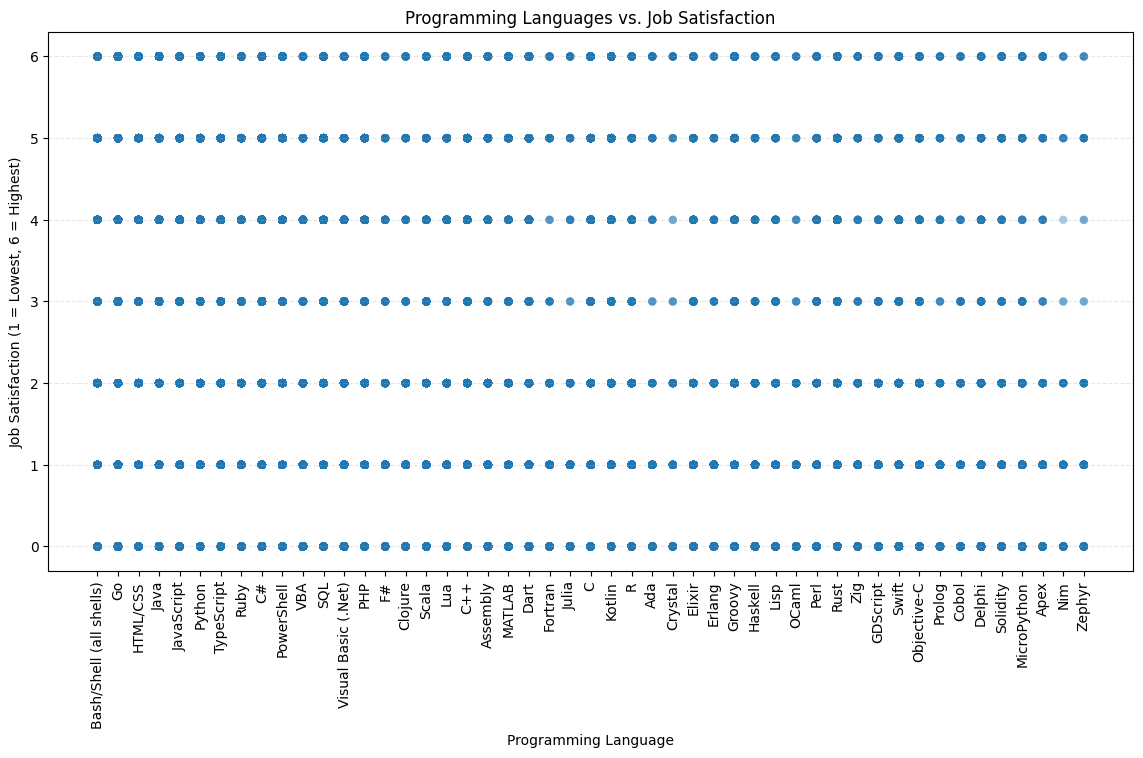

In [46]:
# import pandas as pd
# import matplotlib.pyplot as plt

# 1. Keep only needed columns
df_lang = df[['LanguageHaveWorkedWith', 'JobSatPoints_6']].copy()

# 2. Convert JobSatPoints_6 to numeric (0–100 scale)
df_lang['JobSatPoints_6'] = pd.to_numeric(df_lang['JobSatPoints_6'], errors='coerce')

# 3. Convert satisfaction to 1–6 scale
df_lang['JobSatPoints_6'] = (df_lang['JobSatPoints_6'] / 100 * 6).round()

# 4. Drop missing values
df_lang = df_lang.dropna()

# 5. Split multi‑language entries into separate rows
df_lang = df_lang.assign(
    Language=df_lang['LanguageHaveWorkedWith'].str.split(';')
).explode('Language')

# 6. Drop empty language entries
df_lang = df_lang.dropna(subset=['Language'])

# 7. Scatter plot
plt.figure(figsize=(14, 7))
plt.scatter(
    df_lang['Language'],
    df_lang['JobSatPoints_6'],
    alpha=0.4,
    edgecolor='none'
)

plt.title('Programming Languages vs. Job Satisfaction')
plt.xlabel('Programming Language')
plt.ylabel('Job Satisfaction (1 = Lowest, 6 = Highest)')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.show()


**visualize the popularity of programming languages against job satisfaction using a scatter plot** >where each point represents a satisfaction score for a language someone has worked with. Your plot does exactly that:

- You exploded the multi‑language column correctly.
- Each language appears on the x‑axis.
- Each dot represents one respondent’s satisfaction score.
- The vertical spread shows how satisfaction varies within each language group.
- The plot communicates variation rather than counts, which is exactly what a scatter plot is meant to show in this context.

>Job satisfaction forms wide vertical bands for every language, showing that developers across languages report a broad mix of experiences rather than any language consistently correlating with higher or lower satisfaction.

### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


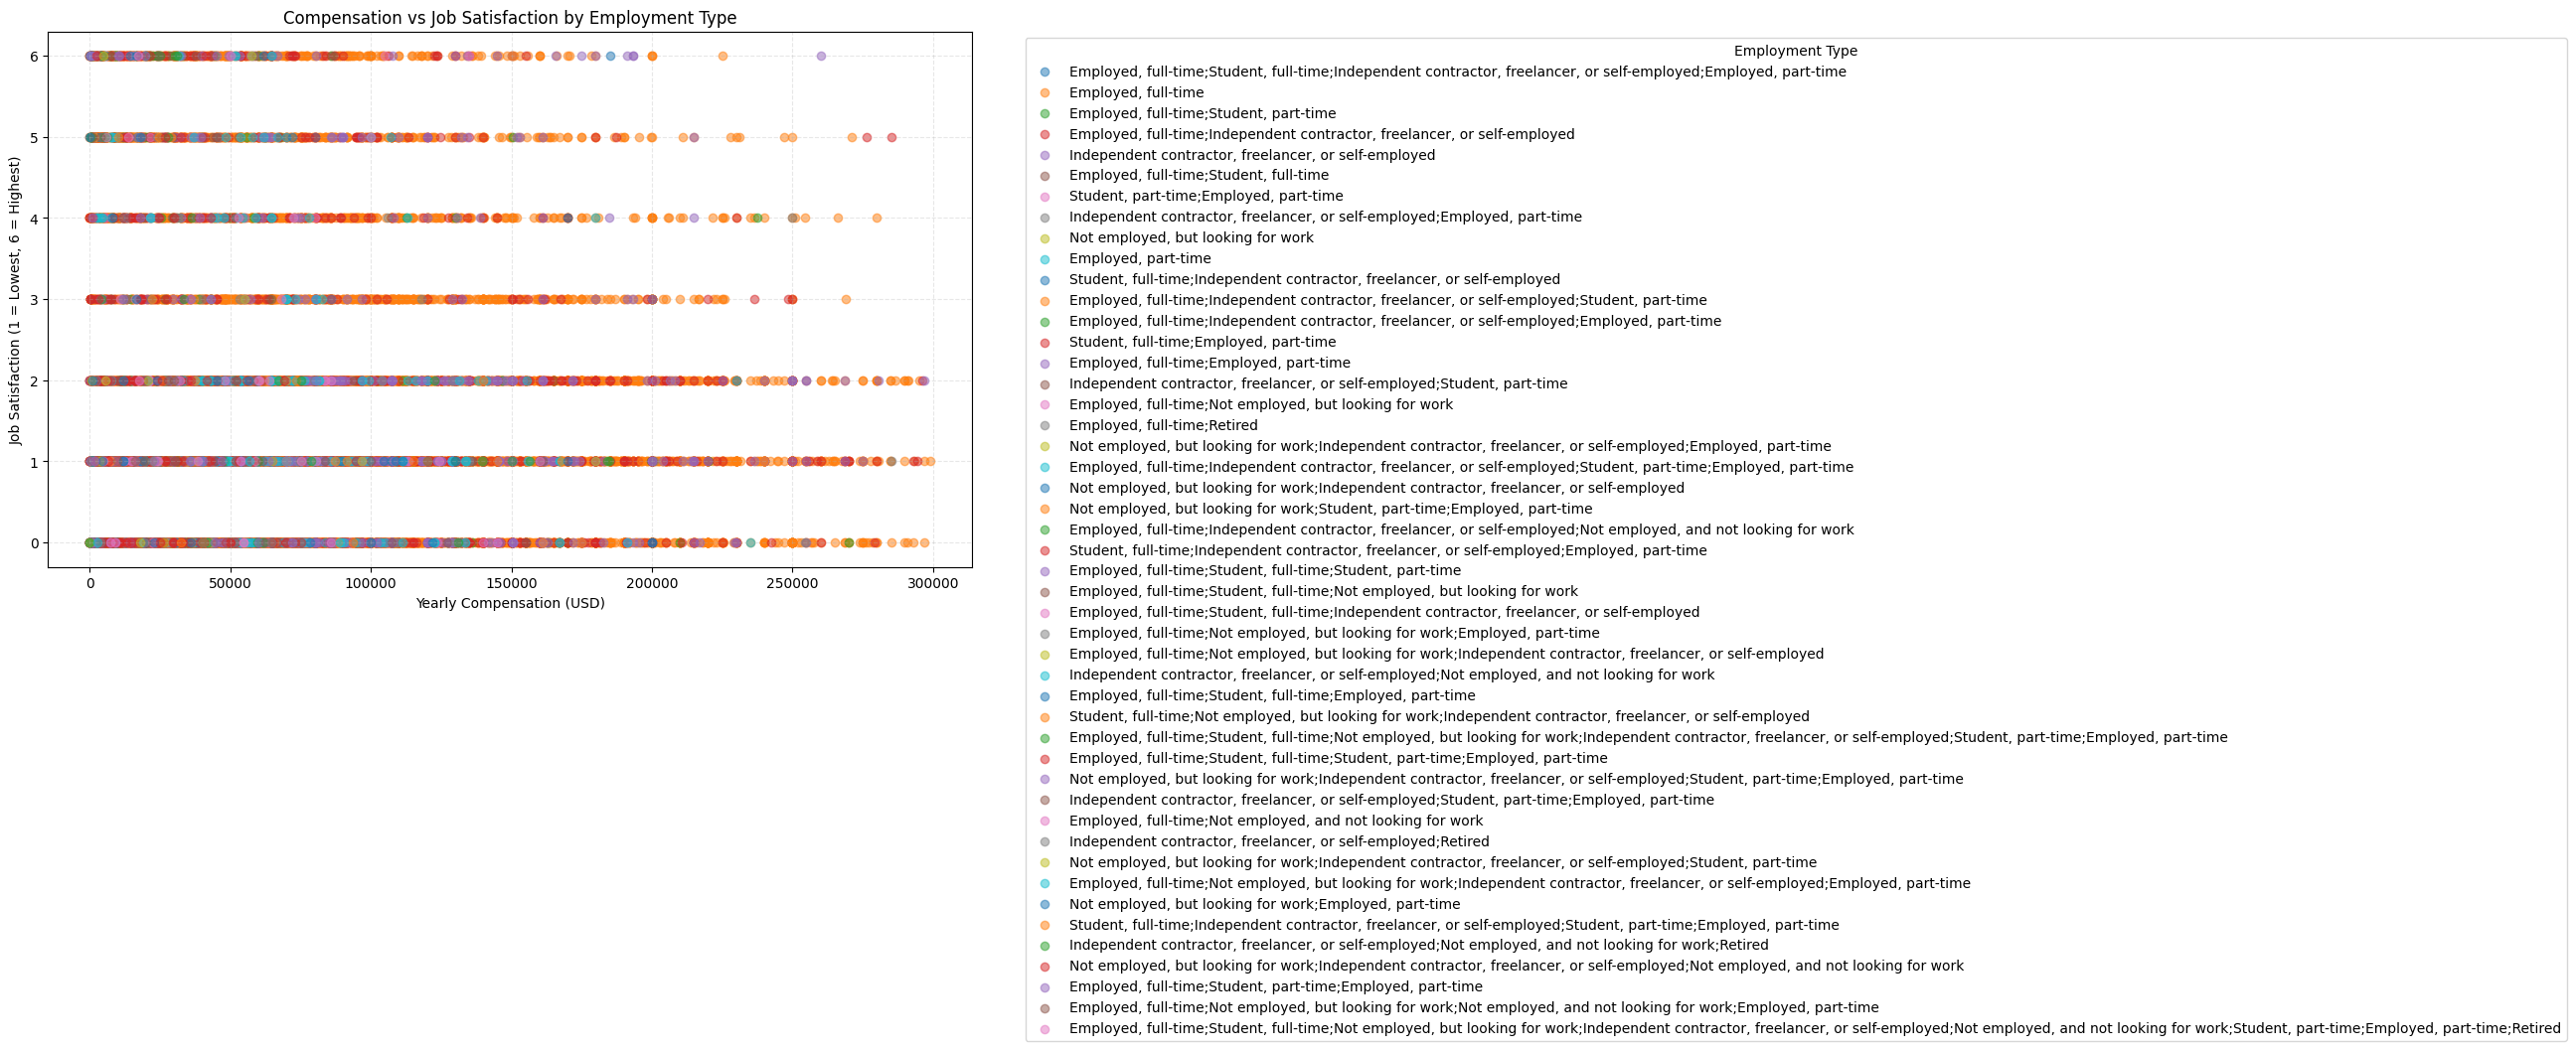

In [55]:
# import pandas as pd
# import matplotlib.pyplot as plt

# 1. Keep only needed columns
df_emp = df[['ConvertedCompYearly', 'JobSatPoints_6', 'Employment']].copy()

# 2. Convert numeric fields
df_emp['ConvertedCompYearly'] = pd.to_numeric(df_emp['ConvertedCompYearly'], errors='coerce')
df_emp['JobSatPoints_6'] = pd.to_numeric(df_emp['JobSatPoints_6'], errors='coerce')

# 3. Convert JobSatPoints_6 from 0–100 → 0–6 scale
df_emp['JobSatPoints_6'] = (df_emp['JobSatPoints_6'] / 100 * 6).round()

# 4. Drop missing values
df_emp = df_emp.dropna()

# 5. Remove extreme compensation outliers
df_emp = df_emp[df_emp['ConvertedCompYearly'] < 300000]

# 6. Unique employment types
employment_types = df_emp['Employment'].unique()

# 7. Scatter plot with color coding
plt.figure(figsize=(12, 7))

for emp in employment_types:
    subset = df_emp[df_emp['Employment'] == emp]
    plt.scatter(
        subset['ConvertedCompYearly'],
        subset['JobSatPoints_6'],
        alpha=0.5,
        label=emp
    )

plt.title('Compensation vs Job Satisfaction by Employment Type')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction (1 = Lowest, 6 = Highest)')
plt.grid(axis='both', linestyle='--', alpha=0.3)
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


#### Explanation Summary

The scatter plot shows how yearly compensation and job satisfaction relate across different employment types after simplifying the categories for clarity. Each group forms a wide vertical spread, indicating that job satisfaction varies substantially within every employment type rather than clustering at a single level. Compensation also spans a broad range for all groups, with most respondents concentrated at lower salary levels and only a few earning higher incomes. The overlap between categories suggests that neither compensation nor employment arrangement alone strongly predicts job satisfaction; instead, individuals in all employment types report a mix of positive and negative experiences.

In [57]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np

# # 1. Keep only needed columns
# df_emp = df[['ConvertedCompYearly', 'JobSatPoints_6', 'Employment']].copy()

# # 2. Convert numeric fields
# df_emp['ConvertedCompYearly'] = pd.to_numeric(df_emp['ConvertedCompYearly'], errors='coerce')
# df_emp['JobSatPoints_6'] = pd.to_numeric(df_emp['JobSatPoints_6'], errors='coerce')

# # 3. Convert JobSatPoints_6 from 0–100 → 0–6 scale
# df_emp['JobSatPoints_6'] = (df_emp['JobSatPoints_6'] / 100 * 6).round()

# # 4. Drop missing values
# df_emp = df_emp.dropna()

# # 5. Remove extreme compensation outliers
# df_emp = df_emp[df_emp['ConvertedCompYearly'] < 300000]

# # 6. Simplify employment categories
# def simplify(emp):
#     if pd.isna(emp):
#         return None
#     emp = str(emp)
#     if "Employed full-time" in emp:
#         return "Employed full-time"
#     if "Employed part-time" in emp:
#         return "Employed part-time"
#     if "Independent contractor" in emp or "self-employed" in emp:
#         return "Self-employed"
#     if "Student" in emp:
#         return "Student"
#     if "Not employed" in emp:
#         return "Not employed"
#     return "Other"

# df_emp['EmploymentSimple'] = df_emp['Employment'].apply(simplify)

# # 7. Add slight jitter to satisfaction to reduce vertical stacking
# df_emp['JobSatJitter'] = df_emp['JobSatPoints_6'] + np.random.uniform(-0.1, 0.1, len(df_emp))

# # 8. Unique simplified categories
# employment_types = df_emp['EmploymentSimple'].dropna().unique()

# # 9. Color palette
# colors = plt.cm.Set2(range(len(employment_types)))

# # 10. Scatter plot
# plt.figure(figsize=(12, 7))

# for i, emp in enumerate(employment_types):
#     subset = df_emp[df_emp['EmploymentSimple'] == emp]
#     plt.scatter(
#         subset['ConvertedCompYearly'],
#         subset['JobSatJitter'],
#         s=20,
#         alpha=0.35,
#         color=colors[i],
#         label=emp
#     )

# plt.title('Compensation vs Job Satisfaction by Employment Type')
# plt.xlabel('Yearly Compensation (USD)')
# plt.ylabel('Job Satisfaction (1 = Lowest, 6 = Highest)')
# plt.grid(axis='both', linestyle='--', alpha=0.3)
# plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# plt.show()


#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


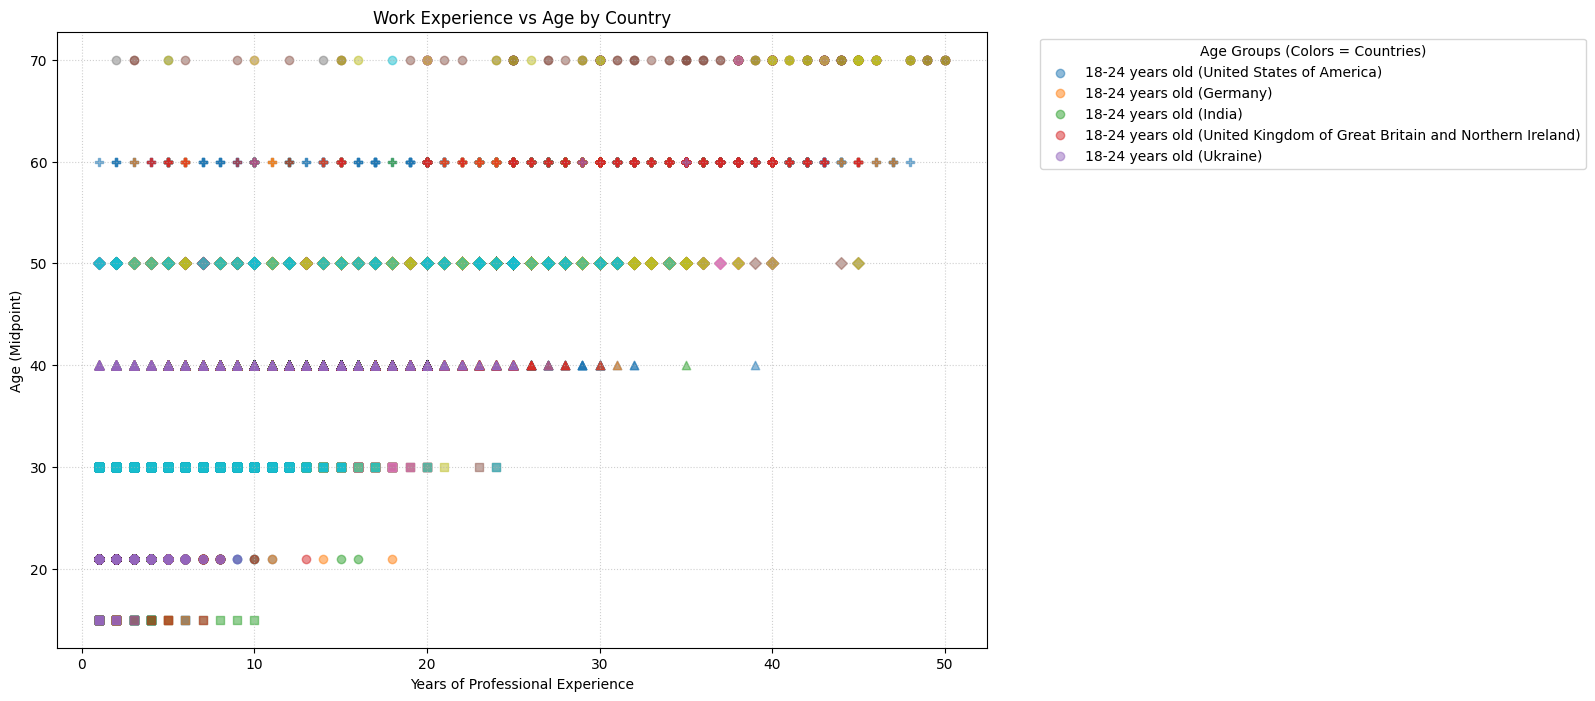

In [61]:
# import pandas as pd
# import matplotlib.pyplot as plt

# 1. Clean and Filter
df_exp = df[['YearsCodePro', 'Age', 'Country']].copy()
df_exp['YearsCodePro'] = pd.to_numeric(df_exp['YearsCodePro'], errors='coerce')

# Map Age to Numbers (Simplified mapping)
age_map = {'Under 18 years old': 15, '18-24 years old': 21, '25-34 years old': 30, 
           '35-44 years old': 40, '45-54 years old': 50, '55-64 years old': 60, '65 years or older': 70}
df_exp['AgeNumeric'] = df_exp['Age'].map(age_map)
df_exp = df_exp.dropna()

# 2. Select Top Countries and Define Styling
top_countries = df_exp['Country'].value_counts().head(5).index
markers = ['o', 's', '^', 'D', 'P']
age_groups = sorted(df_exp['Age'].unique()) # Sorted for consistent legend

plt.figure(figsize=(12, 8))

# 3. Efficient Plotting Loop
for i, age in enumerate(age_groups):
    # Filter by Age once per loop
    subset = df_exp[(df_exp['Age'] == age) & (df_exp['Country'].isin(top_countries))]
    
    # Let Matplotlib handle the color mapping for countries automatically
    # We scatter all countries for this specific marker type
    for j, country in enumerate(top_countries):
        country_subset = subset[subset['Country'] == country]
        plt.scatter(
            country_subset['YearsCodePro'], 
            country_subset['AgeNumeric'],
            marker=markers[i % len(markers)], 
            alpha=0.5,
            label=f"{age} ({country})" if i == 0 else None # Legend strategy
        )

# 4. Final Polish
plt.title('Work Experience vs Age by Country')
plt.xlabel('Years of Professional Experience')
plt.ylabel('Age (Midpoint)')
plt.legend(title="Age Groups (Colors = Countries)", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()


#### Explanation Summary
The scatter plot compares professional coding experience across age groups and countries, revealing a clear age‑related progression: older respondents generally report more years of experience, while younger groups cluster near the lower end of the experience range. The color‑coding highlights differences between countries, but the overall patterns overlap substantially, suggesting that country‑level variation is less pronounced than the strong relationship between age and accumulated experience. Each age group forms a horizontal band, and the spread within those bands shows that individuals of the same age can have widely different experience levels depending on when they entered the field.

In [60]:
# # import pandas as pd
# # import matplotlib.pyplot as plt
# # import numpy as np

# # 1. Keep only needed columns
# df_exp = df[['YearsCodePro', 'Age', 'Country']].copy()

# # 2. Convert YearsCodePro to numeric
# df_exp['YearsCodePro'] = pd.to_numeric(df_exp['YearsCodePro'], errors='coerce')

# # 3. Map Age categories to numeric midpoints
# age_map = {
#     'Under 18 years old': 15,
#     '18-24 years old': 21,
#     '25-34 years old': 30,
#     '35-44 years old': 40,
#     '45-54 years old': 50,
#     '55-64 years old': 60,
#     '65 years or older': 70,
#     'Prefer not to say': None
# }
# df_exp['AgeNumeric'] = df_exp['Age'].map(age_map)

# # 4. Drop missing values
# df_exp = df_exp.dropna()

# # 5. Select top countries for clarity
# top_countries = df_exp['Country'].value_counts().head(6).index
# df_exp = df_exp[df_exp['Country'].isin(top_countries)]

# # 6. Marker shapes for age groups
# markers = ['o', 's', '^', 'D', 'P', 'X', '*']
# age_groups = df_exp['Age'].unique()
# age_marker_map = {age: markers[i % len(markers)] for i, age in enumerate(age_groups)}

# # 7. Color palette for countries
# countries = df_exp['Country'].unique()
# colors = plt.cm.tab10(range(len(countries)))
# country_color_map = {country: colors[i] for i, country in enumerate(countries)}

# # 8. Scatter plot
# plt.figure(figsize=(12, 7))

# for country in countries:
#     for age in age_groups:
#         subset = df_exp[(df_exp['Country'] == country) & (df_exp['Age'] == age)]
#         if len(subset) > 0:
#             plt.scatter(
#                 subset['YearsCodePro'],
#                 subset['AgeNumeric'],
#                 s=40,
#                 alpha=0.5,
#                 color=country_color_map[country],
#                 marker=age_marker_map[age],
#                 label=f"{country} - {age}"
#             )

# plt.title('Work Experience vs Age Group by Country')
# plt.xlabel('Years of Professional Coding Experience')
# plt.ylabel('Age (approximate)')
# plt.grid(axis='both', linestyle='--', alpha=0.3)

# # Avoid duplicate legend entries
# handles, labels = plt.gca().get_legend_handles_labels()
# unique = dict(zip(labels, handles))
# plt.legend(unique.values(), unique.keys(), bbox_to_anchor=(1.05, 1), loc='upper left')

# plt.show()


### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
